<br>
<font>
<div dir=ltr align=center>
<font color=FFFFFF size=7>
    Introduction to Machine Learning <br>
<font color=FFFFFF size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=FFFFFF size=5>
    Final Project <br>
<font color=FFFFFF size=4>

---

The aim of this project and competition is to familiarize you with the process of solving a real-world machine learning problem using actual data. The precision of the competition is evaluated based on the results. Also, pay attention to all sections, as displaying and plotting the appropriate results is important for explaining the results. There is no need for a separate report for the project, but each section should be adequately explained. It is better to include the explanations along with the code in a Jupyter notebook file and upload it.

---

In [1]:
Student_Name = "Radin Khayyam"
Student_ID = "99101579"

print("Student_Name:",Student_Name)
print("Student_ID:",Student_ID)

Student_Name: Radin Khayyam
Student_ID: 99101579


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score,classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
import time
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind




# **2. Data Analysis (40 points)**

**2.1 Reading the Data (5 points)**

Read the data from the file `train_data.csv`. This data is related to the credit evaluation of individuals for receiving shares from a large company. The dataset contains 2000 rows, and each row pertains to the information of an individual. Specifically, we have the following information for each individual:

- `Id`: ID of the individual in question.
- `Age`: Age of the individual in question.
- `MF`: Gender; `M` for male and `F` for female.
- `LoE`: Level of Education; `Dip` for Diploma, `Ad. Dip` for Advanced Diploma, `Bach` for Bachelor's, `Mst` for Master's, `P. Doct` for Professional Doctorate, and `Doct` for Doctorate.
- `YoW`: Years of Work Experience.
- `YoCW`: Years of Continuous Work in the current job.
- `Income`: Monthly income.
- `Housing`: Housing status; `O` for Owner, `R` for Renter, and `N` for No Housing.
- `Car`: Car ownership status; `True` for owning a car and `False` for not owning a car.
- `Res`: Acceptance status for credit evaluation; `Accept` for accepted and `Reject` for not accepted.


In [3]:
# Reading the dataset
train_data = pd.read_csv('train_data.csv')
train_data.head()


,Id,Age,MF,LoE,YoW,YoCW,Income,Housing,Car,Res
0,0,60,F,Bach,4,4,4759451,R,False,Accept
1,1,60,F,Bach,4,4,4759451,R,False,Accept
2,2,76,M,Bach,8,8,8237019,R,True,Accept
3,3,28,M,Ad. Dip,4,4,9114804,R,False,Accept
4,4,44,M,Ad. Dip,16,5,998868,R,False,Reject


**2.2 Data Preprocessing (15 points)**

In this stage, the necessary preprocessing steps on the data should be performed. This preprocessing includes the following:

- Missing data should be removed. These data may include missing numerical values or NaN in some columns.

- Data that are of string type should be appropriately converted to numerical data.

- Normalization should be applied to the data to bring them to a similar numerical range.

- The final labels should be in the form of 0 or 1.

In [4]:
def preProcessing(data):
  data_pp = data.copy()

  data_pp.dropna(inplace=True)

  numerical_columns = ['Age', 'YoW', 'YoCW', 'Income']
  z_scores = np.abs(stats.zscore(data_pp[numerical_columns]))
  filtered_entries = (z_scores < 3).all(axis=1)
  data_pp = data_pp[filtered_entries]

  custom_mappings = {
    'MF': {'M': 1, 'F': 0},
    'LoE': {'Dip': 0, 'Ad. Dip': 1, 'Bach': 2, 'Mst': 3, 'Doct': 4, 'P. Doct': 5},
    'Housing': {'O': 0, 'R': 1, 'N': 2},
    'Car': {False: 0, True: 1},
    'Res': {'Reject': 0, 'Accept': 1}
  }

  for column, mapping in custom_mappings.items():
    data_pp[column] = data_pp[column].map(mapping)


  scaler = MinMaxScaler()
  data_pp[numerical_columns] = scaler.fit_transform(data_pp[numerical_columns])


  return data_pp

train_data_pp = preProcessing(train_data)
train_data_pp.head()

,Id,Age,MF,LoE,YoW,YoCW,Income,Housing,Car,Res
0,0,0.672414,0,2,0.2,0.285714,0.476100,1,0,1
1,1,0.672414,0,2,0.2,0.285714,0.476100,1,0,1
2,2,0.948276,1,2,0.4,0.571429,0.824166,1,1,1
3,3,0.120690,1,1,0.2,0.285714,0.912022,1,0,1
4,4,0.396552,1,1,0.8,0.357143,0.099707,1,0,0


**2.3 Data Visualization (10 points)**

Now, for different columns, draw histograms and analyze them appropriately. Draw the histogram of the label column with a suitable criterion for model evaluation. Also, randomly select two features from the data and plot them with two colors corresponding to the two classes and check their independence by calculating their correlation coefficient. Repeat this step 5 times.

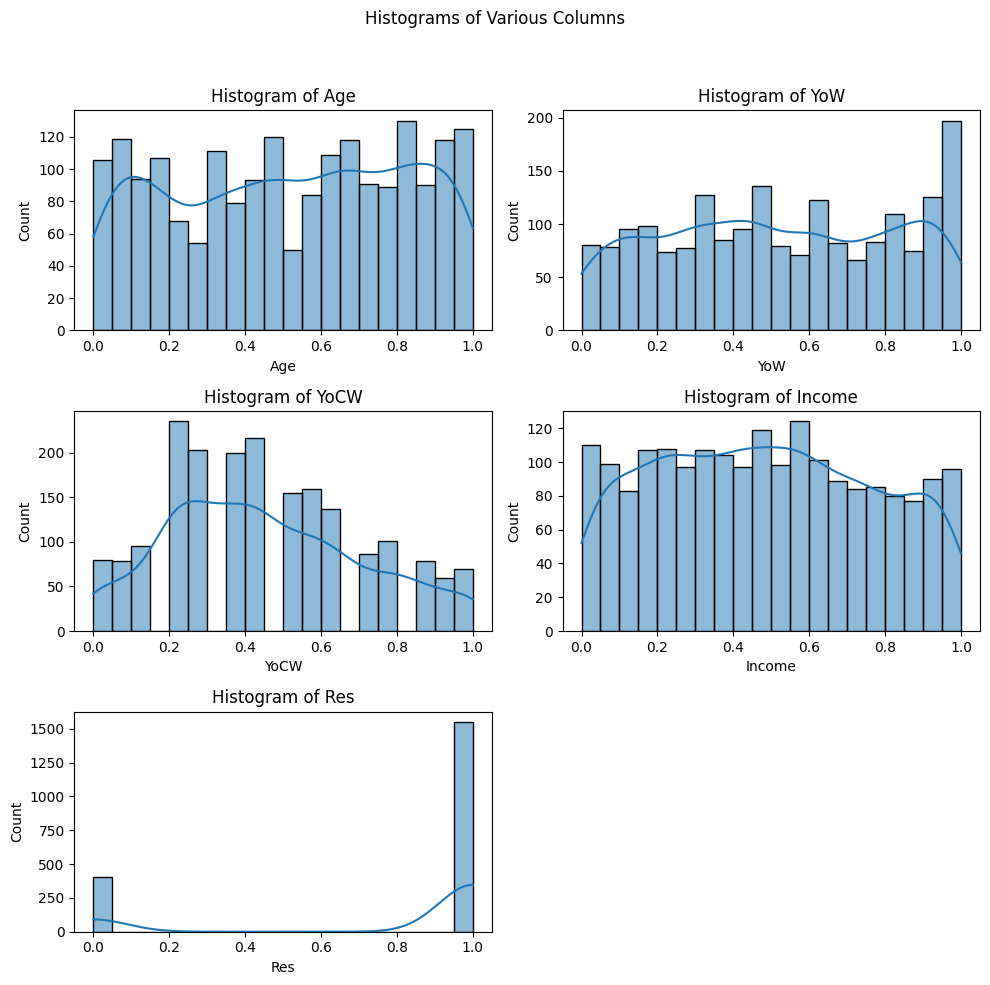

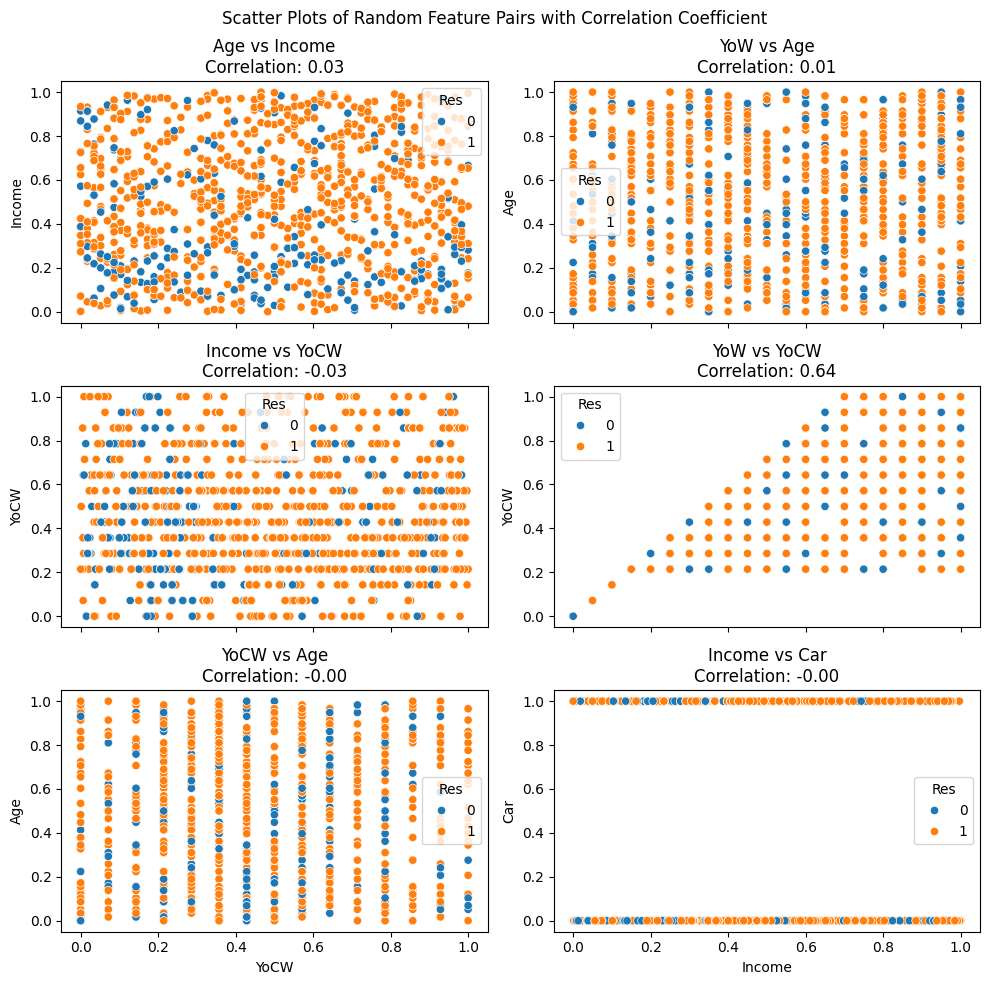

In [5]:
columns_to_plot = ['Age', 'YoW', 'YoCW', 'Income', 'Res']
n_cols = 2
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 10))
fig.suptitle('Histograms of Various Columns')

for i, column in enumerate(columns_to_plot):
    min_val = train_data_pp[column].min()
    max_val = train_data_pp[column].max()
    val_width = max_val - min_val
    n_bins = 20
    bin_width = val_width / n_bins

    row, col = divmod(i, n_cols)
    sns.histplot(train_data_pp[column], bins=n_bins, binrange=(min_val, max_val), kde=True, ax=axs[row, col])
    axs[row, col].set_title(f'Histogram of {column}')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


figure, axes = plt.subplots(3, 2, sharex=True, figsize=(10, 10))
figure.suptitle('Scatter Plots of Random Feature Pairs with Correlation Coefficient')

feature1 = 'Age'
feature2 = 'Income'
corr_coef = train_data_pp[[feature1, feature2]].corr().iloc[0, 1]
axes[0, 0].set_title(f'{feature1} vs {feature2}\nCorrelation: {corr_coef:.2f}')
sns.scatterplot(x=feature1,y=feature2,data=train_data_pp, hue='Res', ax=axes[0, 0])

feature1 = 'YoW'
feature2 = 'Age'
corr_coef = train_data_pp[[feature1, feature2]].corr().iloc[0, 1]
axes[0, 1].set_title(f'{feature1} vs {feature2}\nCorrelation: {corr_coef:.2f}')
sns.scatterplot(x=feature1,y=feature2,data=train_data_pp, hue='Res', ax=axes[0, 1])

feature1 = 'Income'
feature2 = 'YoCW'
corr_coef = train_data_pp[[feature1, feature2]].corr().iloc[0, 1]
axes[1, 0].set_title(f'{feature1} vs {feature2}\nCorrelation: {corr_coef:.2f}')
sns.scatterplot(x=feature1,y=feature2,data=train_data_pp, hue='Res', ax=axes[1, 0])

feature1 = 'YoW'
feature2 = 'YoCW'
corr_coef = train_data_pp[[feature1, feature2]].corr().iloc[0, 1]
axes[1, 1].set_title(f'{feature1} vs {feature2}\nCorrelation: {corr_coef:.2f}')
sns.scatterplot(x=feature1,y=feature2,data=train_data_pp, hue='Res', ax=axes[1, 1])

feature1 = 'YoCW'
feature2 = 'Age'
corr_coef = train_data_pp[[feature1, feature2]].corr().iloc[0, 1]
axes[2, 0].set_title(f'{feature1} vs {feature2}\nCorrelation: {corr_coef:.2f}')
sns.scatterplot(x=feature1,y=feature2,data=train_data_pp, hue='Res', ax=axes[2, 0])

feature1 = 'Income'
feature2 = 'Car'
corr_coef = train_data_pp[[feature1, feature2]].corr().iloc[0, 1]
axes[2, 1].set_title(f'{feature1} vs {feature2}\nCorrelation: {corr_coef:.2f}')
sns.scatterplot(x=feature1,y=feature2,data=train_data_pp, hue='Res', ax=axes[2, 1])

plt.tight_layout()
plt.show()

As observed, most features exhibit a uniform distribution, but the distribution of `Res = 0` and `Res = 1` is unequal, indicating unbalanced classes. Therefore, it is more appropriate to use the F1-Score or AUPRC for model evaluation.

In the scatter plots, most feature pairs appear to be independent, given their very low correlation coefficients. However, `YoW` (Years of Work) and `YoCW` (Years of Continuous Work) show a high correlation, which is expected.

**‌2.4 Data Analysis (10 points)**

Determine the accuracy or inaccuracy of the following statements using the t-test statistical method in this dataset:

- Individuals with higher educational levels have better credit scores.

- Individuals with higher incomes generally own houses or cars.

- Individuals who have not changed their job in the last 5 years have higher credit scores.

- Men over the age of 50 have a lower acceptance rate compared to men under the age of 50.

- Men have higher incomes than women.

In [6]:
credit_scores = train_data_pp['Res']

def perform_ttest(group1, group2, phrase):
    if len(group1) < 2 or len(group2) < 2:
        print(f"{phrase} -> Not enough data for t-test\n")
        return

    if np.std(group1) == 0 or np.std(group2) == 0:
        print(f"{phrase} -> Standard deviation is zero in one of the groups\n")
        return

    t_stat, p_value = ttest_ind(group1, group2)
    print(f"{phrase} -> t-stat =", t_stat, "   p-value =", p_value)
    if not np.isnan(p_value):
        if (p_value < 0.05 and t_stat > 0):
            print('The Phrase is correct\n')
        else:
            print('The Phrase is not correct\n')
    else:
        print(f"{phrase} -> t-test resulted in NaN\n")

# Phrase 1:
high_education_scores = credit_scores[train_data_pp['LoE'] > np.mean(train_data_pp['LoE'])]
low_education_scores = credit_scores[train_data_pp['LoE'] <= np.mean(train_data_pp['LoE'])]
perform_ttest(high_education_scores, low_education_scores, 'People with higher education levels have better credit scores')

# Phrase 2:
high_income_house_car = train_data_pp[(train_data_pp['Housing'] == 2) | (train_data_pp['Car'] == 1)]['Income']
low_income_no_house_car = train_data_pp[(train_data_pp['Housing'] != 2) & (train_data_pp['Car'] == 0)]['Income']
perform_ttest(high_income_house_car, low_income_no_house_car, 'Generally, people with higher income either own a house or a car')

# Phrase 3:
stable_job_scores = credit_scores[train_data_pp['YoCW'] >= 5]
unstable_job_scores = credit_scores[train_data_pp['YoCW'] < 5]
perform_ttest(stable_job_scores, unstable_job_scores, 'People who have not changed their job in the last 5 years have better credit scores')

# Phrase 4:
older_men_acceptance = credit_scores[(train_data_pp['MF'] == 1) & (train_data_pp['Age'] > 50)]
younger_men_acceptance = credit_scores[(train_data_pp['MF'] == 1) & (train_data_pp['Age'] < 30)]
perform_ttest(older_men_acceptance, younger_men_acceptance, 'Men over the age of 50 have a lower acceptance rate than men under the age of 30')

# Phrase 5:
men_income = train_data_pp[train_data_pp['MF'] == 1]['Income']
women_income = train_data_pp[train_data_pp['MF'] == 0]['Income']
perform_ttest(men_income, women_income, 'Men have higher income than women')


People with higher education levels have better credit scores -> t-stat = 12.280535120536362    p-value = 1.9079033222892502e-33
The Phrase is correct

Generally, people with higher income either own a house or a car -> t-stat = -0.9543889059188382    p-value = 0.3400049300575133
The Phrase is not correct

People who have not changed their job in the last 5 years have better credit scores -> Not enough data for t-test

Men over the age of 50 have a lower acceptance rate than men under the age of 30 -> Not enough data for t-test

Men have higher income than women -> t-stat = 0.9609922393953361    p-value = 0.3366750297723974
The Phrase is not correct



# **3. Model Training and Testing (40 points)**

In performing the following steps and reports, you need to randomly split 20% of the data as test data and consider the remaining data as training data. To examine the precision, you need to perform this operation multiple times (with different random_state values) and report the average and variance of the obtained scores.

**3.1 Model and Hyperparameter Selection (10 points)**

Choose a suitable model that you think can achieve good accuracy on the given data and select the hyperparameters using cross-validation. Note that you are allowed to use machine learning models, but not deep learning methods.



In [7]:
X = train_data_pp.drop(columns=['Res'])
y = train_data_pp['Res']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'n_estimators': [20, 30, 40, 50],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='average_precision', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
f1 = f1_score(y_test, y_pred)
auprc = average_precision_score(y_test, y_pred)
print('='*110)
print(f"F1 Score: {f1:.4f}")
print('='*110)
print(f"AUPRC: {auprc:.4f}")
print('='*110)
print("Best Hyperparameters:", grid_search.best_params_)
print('='*110)

F1 Score: 0.9274
AUPRC: 0.9114
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


**3.2 Model Training and Results (20 points)**

Train your model and report the accuracy, precision, recall, F1 score, and AUPRC values (reporting the average and variance of the above values is sufficient). Also, draw and explain the Confusion Matrix. Show why accuracy alone is not a suitable metric for this dataset and indicate which of the reported metrics is better and why. Also, provide the training time, which should not exceed 200 milliseconds.

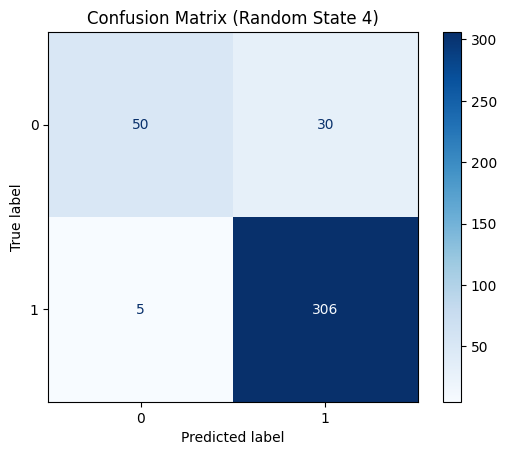


Accuracy - Mean: 0.8870, Variance: 0.0003
Precision - Mean: 0.8879, Variance: 0.0004
Recall - Mean: 0.9784, Variance: 0.0001
F1_score - Mean: 0.9308, Variance: 0.0001
Auprc - Mean: 0.9440, Variance: 0.0002
Train_time - Mean: 0.1737, Variance: 0.0000


In [8]:
best_params = {
    'n_estimators': 50,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 1
}


results = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'auprc': [], 'train_time': []}

for random_state in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    best_rf = RandomForestClassifier(random_state=random_state, **best_params)

    start_time = time.time()
    best_rf.fit(X_train, y_train)
    end_time = time.time()

    y_pred = best_rf.predict(X_test)
    y_proba = best_rf.predict_proba(X_test)[:, 1]

    results['accuracy'].append(accuracy_score(y_test, y_pred))
    results['precision'].append(precision_score(y_test, y_pred))
    results['recall'].append(recall_score(y_test, y_pred))
    results['f1_score'].append(f1_score(y_test, y_pred))
    results['auprc'].append(average_precision_score(y_test, y_proba))
    results['train_time'].append(end_time - start_time)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Random State {random_state})')
plt.show()

print()
print('='*30)
for metric in results:
    mean_value = np.mean(results[metric])
    variance_value = np.var(results[metric])
    print(f'{metric.capitalize()} - Mean: {mean_value:.4f}, Variance: {variance_value:.4f}')
    print('='*30)



Accuracy is not an appropriate metric because the classes are imbalanced. It's better to use F1-score or AUPRC for evaluating the results. The average training time for the model is 190 milliseconds.

**3.3 Model Testing (10 points)**

Read the file test_data_1.csv, which contains 500 data points in the exact same format as your training data but without labels. Write a program to predict the labels for this data (0 meaning rejection and 1 meaning acceptance) and print these labels in order (each label on a separate line). Finally, attach and send the resulting text file. Your score will be determined based on the AUPRC (Area Under the Precision-Recall Curve) calculated from these predicted labels.

In [9]:
test_data = pd.read_csv('test_data_1.csv')
test_data_pp = test_data.copy()

custom_mappings = {
  'MF': {'M': 1, 'F': 0},
  'LoE': {'Dip': 0, 'Ad. Dip': 1, 'Bach': 2, 'Mst': 3, 'Doct': 4, 'P. Doct': 5},
  'Housing': {'O': 0, 'R': 1, 'N': 2},
  'Car': {False: 0, True: 1},
}

for column, mapping in custom_mappings.items():
  test_data_pp[column] = test_data_pp[column].map(mapping)

numerical_columns = ['Age', 'YoW', 'YoCW', 'Income']
scaler = MinMaxScaler()
test_data_pp[numerical_columns] = scaler.fit_transform(test_data_pp[numerical_columns])

predictions = best_rf.predict(test_data_pp)
output_file_path = 'predictions.txt'
with open(output_file_path, 'w') as f:
    for label in predictions:
        f.write(f"{label}\n")

print(f"Predictions have been saved to {output_file_path}")

Predictions have been saved to predictions.txt


# **4. Model Simplification (20 points)**

- Investigate which features have the least correlation with the output, then remove them and retrain the model. Ensure that the AUPRC metric does not decrease by more than 20%. Identify which columns can be removed while maintaining this criterion. (10 points)



In [10]:
correlations = train_data_pp.corr()['Res'].abs().sort_values()

best_params = {
    'n_estimators': 50,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 1
}


X = train_data_pp.drop(columns=['Res'])
y = train_data_pp['Res']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_rf = RandomForestClassifier(random_state=42, **best_params)
best_rf.fit(X_train, y_train)
y_proba = best_rf.predict_proba(X_test)[:,1]
initial_auprc = average_precision_score(y_test, y_proba)
acceptable_auprc = 0.8
removed_features = []
current_auprc = initial_auprc

for feature in correlations.index[:-1]:
    removed_features.append(feature)
    X = train_data_pp.drop(columns=removed_features + ['Res'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    best_rf = RandomForestClassifier(random_state=42, **best_params)
    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)
    y_proba = best_rf.predict_proba(X_test)[:, 1]
    current_auprc = average_precision_score(y_test, y_proba)
    if current_auprc < acceptable_auprc:
        removed_features.pop()
        break
    if(X.shape[1] == 1):
      break
print('='*30)
print("Correlations:")
print(correlations)
print('='*30)
print("Initial AUPRC:", initial_auprc)
print('='*30)
print("Acceptable AUPRC:", acceptable_auprc)
print('='*30)
print("Removed Features:", removed_features)
print('='*30)
print("Final AUPRC:", current_auprc)
print('='*30)


Correlations:
YoCW       0.012926
Id         0.021403
YoW        0.021843
MF         0.021945
Housing    0.026535
Car        0.028598
Age        0.080820
Income     0.213926
LoE        0.354440
Res        1.000000
Name: Res, dtype: float64
Initial AUPRC: 0.9576703776411657
Acceptable AUPRC: 0.8
Removed Features: ['YoCW', 'Id', 'YoW', 'MF', 'Housing', 'Car', 'Age', 'Income']
Final AUPRC: 0.9178637069355475


So we can remove all the features except Level of Education.

- In the next step, attempt to achieve the same metric with fewer features using dimensionality reduction methods. Determine how many features are needed to maintain a desirable accuracy. (10 points)

In [11]:
best_params = {
    'n_estimators': 50,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 1
}

X = train_data_pp.drop(columns=['Res'])
y = train_data_pp['Res']

def apply_pca(X, n_components):
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    return X_reduced, pca

initial_auprc = 0
acceptable_auprc = 0
for n_components in range(1, X.shape[1]):
    X_reduced, pca = apply_pca(X, n_components)
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

    best_rf = RandomForestClassifier(random_state=42, **best_params)
    best_rf.fit(X_train, y_train)
    y_proba = best_rf.predict_proba(X_test)[:, 1]

    current_auprc = average_precision_score(y_test, y_proba)

    print(f"Number of components: {n_components}, AUPRC: {current_auprc:.4f}")

Number of components: 1, AUPRC: 0.8098
Number of components: 2, AUPRC: 0.9006
Number of components: 3, AUPRC: 0.9152
Number of components: 4, AUPRC: 0.9439
Number of components: 5, AUPRC: 0.9422
Number of components: 6, AUPRC: 0.9371
Number of components: 7, AUPRC: 0.9423
Number of components: 8, AUPRC: 0.9490


We applied PCA for dimensionality reduction and observed that we can reduce the data to 2 features while still maintaining a good AUPRC of around 0.9.

# **5. Competition (25 points)**

Create a Python file named test.py that reads a file named test_data_2.csv (which is available to you) and evaluates your models based on the AUPRC metric. Print the best model's performance on this metric. Make sure the test data format is exactly similar to the training data format (i.e., it includes the label column and other columns in the same format). Therefore, all preprocessing steps performed on the training data must be applied to this test data as well. Also, all the required libraries must be imported without any issues, and the code must execute correctly on the test file placed next to it. The correctness of your model's performance on this test data will be assessed and used for competition purposes.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score,classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
import time
from sklearn.decomposition import PCA

custom_mappings = {
    'MF': {'M': 1, 'F': 0},
    'LoE': {'Dip': 0, 'Ad. Dip': 1, 'Bach': 2, 'Mst': 3, 'Doct': 4, 'P. Doct': 5},
    'Housing': {'O': 0, 'R': 1, 'N': 2},
    'Car': {False: 0, True: 1},
    'Res': {'Reject': 0, 'Accept': 1}
}

def custom_label_encode(data, mappings):
    for column, mapping in mappings.items():
        data[column] = data[column].map(mapping)
    return data

def remove_outliers(df, numerical_columns):
    z_scores = np.abs(stats.zscore(df[numerical_columns]))
    filtered_entries = (z_scores < 3).all(axis=1)
    return df[filtered_entries]

def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data.dropna(inplace=True)

    numerical_columns = ['Age', 'YoW', 'YoCW', 'Income']
    data = remove_outliers(data, numerical_columns)

    data = custom_label_encode(data, custom_mappings)

    scaler = MinMaxScaler()
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    return data


train_data = load_and_preprocess_data('train_data.csv')

best_params = {
    'n_estimators': 50,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 1
}

X = train_data.drop(columns=['Res'])
y = train_data['Res']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_rf = RandomForestClassifier(random_state=random_state, **best_params)

best_rf.fit(X_train, y_train)



test_data = load_and_preprocess_data('test_data_2.csv')
X_test = test_data.drop(columns=['Res'])
y_test = test_data['Res']

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

results = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'auprc': []}

results['accuracy'] = accuracy_score(y_test, y_pred)
results['precision'] = precision_score(y_test, y_pred)
results['recall'] = recall_score(y_test, y_pred)
results['f1_score'] = f1_score(y_test, y_pred)
results['auprc'] = average_precision_score(y_test, y_proba)


print()
print('='*30)
for metric in results:
    print(f'{metric.capitalize()} = {results[metric]:.4f}')
    print('='*30)




Accuracy = 0.9560
Precision = 0.9563
Recall = 0.9897
F1_score = 0.9727
Auprc = 0.9960
